# Deep Dive: Plotting Neurons
This tutorial will guide you through the process of plotting neurons using the CRANTpy library. We will cover the basics of loading neuron data, visualizing it in 2D and 3D, and customizing the plots to enhance their appearance. We introduce how to plot single neurons and multiple neurons, and how to visualize them in the context of the whole brain mesh. 

In [63]:
# Import CRANTpy and other necessary libraries
import crantpy as cp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import navis
import cloudvolume as cv
import pyvista as pv

# Set up logging to see progress
cp.set_logging_level("WARNING")
navis.set_loggers('WARNING')

print("CRANTpy loaded successfully!")
print(f"Default dataset: {cp.CRANT_DEFAULT_DATASET}")

CRANTpy loaded successfully!
Default dataset: latest


## 1. Authentication Setup

First, ensure you are authenticated with the CAVE service.

In [64]:
# Generate and save authentication token (uncomment if first time)
# cp.generate_cave_token(save=True)

# Test connection
try:
    client = cp.get_cave_client()
    print(f"Successfully connected to datastack: {client.datastack_name}")
    print(f"Server: {client.server_address}")
except Exception as e:
    print(f"Connection failed: {e}")
    print("Please run: cp.generate_cave_token(save=True)")

Successfully connected to datastack: kronauer_ant
Server: https://proofreading.zetta.ai


## 2. Exploring Skeletons 

You can generate skeletons for neurons using the L2 chunked graphs and CloudVolume. The full suite of [Navis](https://navis-org.github.io/navis/) visualizations and analysis functions are available once you retrieve these data types. 
- The function `get_l2_skeleton` returns a `navis.TreeNeuron` or `navis.NeuronList`. 


### Generate L2 skeleton for a single neuron 

Let's start by retrieving the L2 skeleton for a single neuron. 

In [65]:
neuron_id = 576460752664524086
skeleton = cp.get_l2_skeleton(neuron_id)

Now we can plot using `plot2d` and `plot3d` from [Navis](https://navis-org.github.io/navis/). We can specify the neuron's color and the axes the perspective of the camera. 

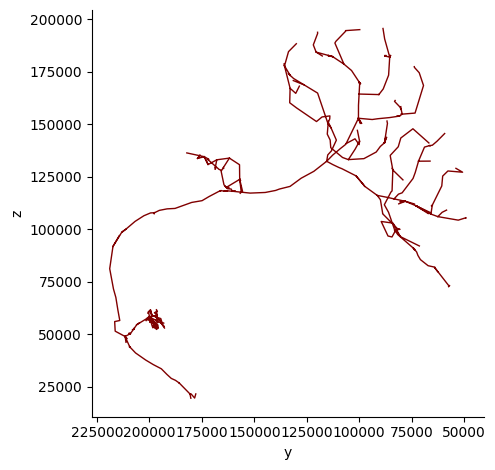

In [66]:
fig, ax = navis.plot2d(skeleton, view=("-y", "z"), color='maroon')
plt.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

Alternatively, we can color the neuron by it's depth (distance to camera) and increase the thickness of the skeleton line: 

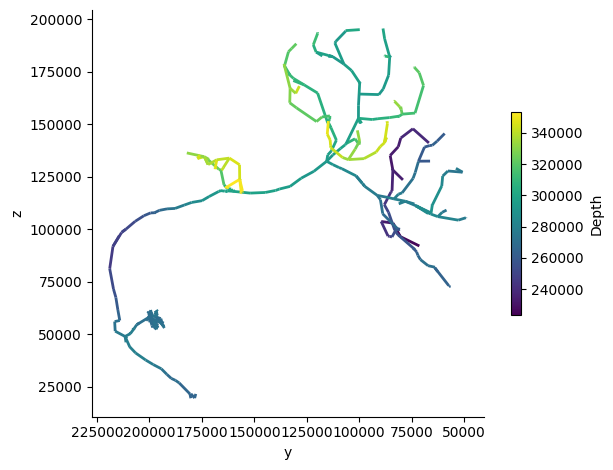

In [67]:
fig, ax = navis.plot2d(skeleton, view=("-y", "z"), depth_coloring=True, palette='viridis', linewidth=2)
plt.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

### Generate L2 skeleton for multiple neuron 

Now let's retrieve the L2 skeleton for multiple neuron root IDs and plot them in 3D. 

In [68]:
neuron_ids = [576460752641833774, 576460752664524086, 576460752662516321]
skeletons = cp.get_l2_skeleton(neuron_ids)

Fetching L2 skeletons:   0%|          | 0/3 [00:00<?, ?it/s]

In [76]:
fig = skeletons.plot3d(backend='plotly', inline=False, palette='Set1')
fig.write_html('../_static/multiple_neurons_skeletons.html', include_plotlyjs="inline", full_html=True)

```{raw} html
<iframe src="../_static/multiple_neurons_skeletons.html"
        width="100%" height="600" style="border:0;"></iframe>

## 3. Neuron mesh

You can also generate meshes for neurons using the CloudVolume. 
- The function `get_mesh_neuron` returns a `navis.MeshNeuron` or `navisNeuronList`. 


### Generate mesh for a single neuron 

Let's generate a mesh for a single neuron and plot it in 2D. 

In [71]:
neuron_id = 576460752664524086
mesh = cp.get_mesh_neuron(neuron_id)

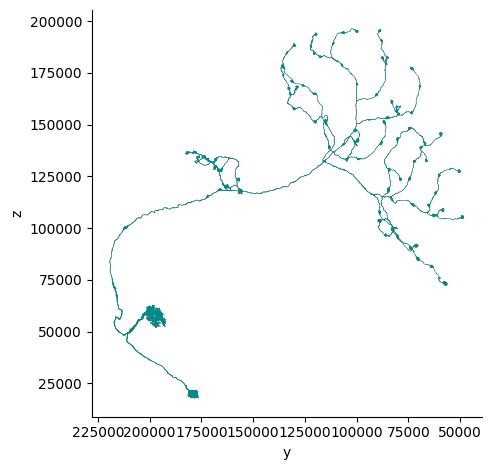

In [72]:
fig, ax = navis.plot2d(mesh, view=("-y", "z"), color='darkcyan')
plt.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

### Generate mesh for multiple neuron 

Now let's retrieve the mesh for multiple neuron root IDs and plot them in 3D. 

### Multiple Neurons

In [73]:
neuron_ids = [576460752641833774, 576460752664524086, 576460752662516321]
meshes = cp.get_mesh_neuron(neuron_ids)

Fetching meshes:   0%|          | 0/3 [00:00<?, ?it/s]

In [74]:
fig = meshes.plot3d(backend='plotly', inline=False, palette='Set1')
fig.write_html('../_static/multiple_neurons_meshes.html', include_plotlyjs="inline", full_html=True)

```{raw} html
<iframe src="../_static/multiple_neurons_meshes.html"
        width="100%" height="600" style="border:0;"></iframe>

## 4. Combining neuron and brain mesh 

Often, it is useful to visualize a neuron(s) in the context of the whole brain mesh. To do this, we have built a tool `get_brain_mesh_scene` that returns a [pyvista](https://pyvista.org) `Plotter` object that allows for 3D rendering of neuron(s) within the whole brain mesh. It uses the `get_mesh_neuron` that we used above to retrieve the mesh for each neuron. 

In [75]:
neuron_ids = [576460752641833774, 576460752664524086, 576460752662516321]
plotter = cp.get_brain_mesh_scene(neuron_ids, backend='html')
plotter.export_html("../_static/multiple_neurons_meshes_with_brain.html")

Fetching meshes:   0%|          | 0/3 [00:00<?, ?it/s]

```{raw} html
<iframe src="../_static/multiple_neurons_meshes_with_brain.html" width="100%" height="600" style="border:0;"></iframe>